![Chapeau](images/chapeau_challenge_collectif.png)

<center><h1>Epilepsy seizure challenge</h1></center>

<center><h3>A data challenge on almost real-time classification of an epilepsy seizure.</h3></center>
<br/>
<center><i>Thomas Bersani--Veroni (ENS, IPP), Kellian Cottart (ECE, IPP), Luc Gensbittel (EMSST, IPP), Titouan Lermite (ECE, IPP), Xavier Loison (EMSST, IPP), Mathys Noir (ECE, IPP) </i></center>

# Table of content <a class="anchor" id="chapter_00"></a>

* [1. Introduction to Epilepsy](#chapter_1)
* [2. Challenge presentation](#chapter_2)
* [3. Starting with the challenge](#chapter_3)
* [4. Making a submission](#chapter_4)
* [References and acknowledgments](#chapter_5)

$\rightarrow$ Going to the [GitHub repo](https://github.com/kellianoy/epilepsy_seizure.git) of the challenge.

# 1. Introduction to Epilepsy <a class="anchor" id="chapter_1"></a>

[TABLE OF CONTENT](#chapter_00)

This challenge consists in categorizing EEG signals recorded on children suffering from epilepsy. It aims at **easing detection** of epileptic seizure recurrence and, **through early detection, fostering prevention** from effects and complication induced by an epileptic seizure. 

<span style="color:red"> <b> Warning :</b> </span> downloading the original dataset is long (around 20 minutes). We recommend to start downloading it [here](#download) before looking at the introduction.


Credentials
---

This challenge is inspired from an article[[1]](#ref_1) published in 2018 and proposing Integer Convolutional Neural Network to detect epileptic seizure. The article cited uses three different data sets collected from the Freiburg Hospital intracranial EEG data set[[2]](#ref_2), the Children’s Hospital of Boston-MIT scalp EEG data set[[3]](#ref_3) and UPenn & Mayo Clinic’s seizure detection data set[[4]](#ref_4) but this challenge only uses the **data set from the Children’s Hospital of Boston-MIT**(more details in *Processing the data* section).

![Epilepsy](images/Galaxy_brain_female_stage_2.png)

Epilepsy
---

Epilepsy is a chronic disease of the brain. The World Health Organization[[5]](#ref_5) estimates that it affects around 50 million people worldwide. It is characterized by recurrent seizures, which are brief episodes of involuntary movement that may involve a part of the body (partial) or the entire body (generalized). The estimated proportion of the general population with active epilepsy (i.e. continuing seizures or with the need for treatment) is between 4 and 10 per 1000 people.

* Seizure episodes are a result of **excessive electrical discharges** in a group of brain cells. 
* **Different parts of the brain** can be the site of such discharges.
* Seizures can **vary in duration** from the briefest lapses of muscle jerks to severe and prolonged convulsions.
* Seizures can also **vary in frequency**, from less than one per year to several per day.

>$\rightarrow$ *The electrical discharges can be captured with electrodes.*<br>
>$\rightarrow$ *Discharges will not always be recorded by the same electrodes.*<br>
>$\rightarrow$ *Duration & frequency are not key criteria to categorize an epileptic seizure.*

Moreover, characteristics of seizures depend on where in the brain the disturbance first starts, and how far it spreads.

Causes & Diagnosis
---

Although many underlying disease mechanisms can lead to epilepsy, the cause of the disease is still unknown in about 50% of cases globally.

**Epilepsy is not always properly diagnosed**, especially in low- and middle-income countries, where almost 80% of people with epilepsy live. An abnormal **electroencephalography (EEG) pattern is one of the two most consistent predictors of seizure recurrence** (as one seizure does not signify epilepsy).

>$\rightarrow$ *EEG is one solution to diagnose epilepsy and predict seizure recurrence.*

Life expectancy & Treatment
---

People with epilepsy tend to have more physical problems (such as fractures), as well as higher risks of psychological disorders, including anxiety and depression. The risk of premature death in people with epilepsy is up to three times higher than in the general population. **Persistent epileptic seizure are considered as such as an emergency** and can cause particularly serious sequelae. In addition, **a great proportion of the causes of death related to epilepsy are potentially preventable**, such as falls, drowning, burns and prolonged seizures. 

>$\rightarrow$ *Medical intervention at the onset of an epileptic seizure reduces the risk of complications.*

Finally, seizures can be controlled: most of people living with epilepsy could become seizure free with appropriate use of antiseizure medicines. Discontinuing antiseizure medicine can even be considered after 2 years without seizures. Surgery might also be beneficial to patients who respond poorly to drug treatments.

# 2. Challenge presentation <a class="anchor" id="chapter_2"></a>

[TABLE OF CONTENT](#chapter_00)

Classification challenge rationale  
---

When diagnosed, about two-thirds of people suffering from epilepsy can be treated with medication, and 7-8% can be cured with surgery.
>$\rightarrow$ *Categorizing epileptic seizures through EEG could be of interest for seizures that occur at a very low frequency or with a low intensity (such that it does not alarm the patient).* 

The patients who cannot be treated with medication or surgery suffer from refractory epilepsy, meaning that they are not able to control their seizures. 
>$\rightarrow$ *For more intense seizures, being able to categorize a seizure at its early stage could help to warn the patient so that it can adopt a safe position and fasten emergency or relatives contact, to check whether the patient is safe and decide whether to intervene.*

State of the art
---

According to the aformentioned article, most of the methods relying on EEG are based on ideas such as thresholding or basic machine learning models. However, these methods can provide unsatisfactory results. Better results can be obtained by using time-frequency analysis, but these methods are costly in terms of computation and memory. One could use FFT (Fast Fourier Transform) to extract features from EEG, but as it is often used with SVM (Support Vector Machine), it is also highly computationally expensive. Deep learning with CNN (Convolutional Neural Network) and RNN (Recurrent Neural Network) are promising alternatives.

Classification challenge
---

When capturing an epileptic seizure, the electroencephalogram can be divided into four phases:
- **inter-ictal**, when no clue of an epileptic seizure can be detected,
- **pre-ictal**, when premises of a seizure can be detected,
- **ictal**, charectarizing the epileptic seizure,
- **post-ictal**, after the epileptic seizure.

Pre-ictal and post-ictal phases will be removed from the EEG signals:
- there is no interest to categorize EEG signal once the epileptic seizure has occurred, 
- the sampling strategy depicted later in the notebook makes categorizing the pre-ictal phase tendencious as the symptoms may appear discontinuously. 

<b>Challenge:</b> This challenge consists in classifying the EEG phase that are interictal and phase.

Presenting the data
---

The data set has been retrieved from the *Children’s Hospital of Boston-MIT scalp EEG* data set. This resource has been made available with the following publication:
> * Ali Shoeb. Application of Machine Learning to Epileptic Seizure Onset Detection and Treatment. PhD Thesis, Massachusetts Institute of Technology, September 2009.[[6]](#ref_6)
> * Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.

**Note about the data:** Any use of the data from this challenge must comply with the requirements of owners of the Database (see ref. [[3]](#ref_3)).

In this data set, the EEG of 22 patients (5 male and 17 female, from 1.5 to 19 years old) have been recorded :
* for about 24 hours periods (around one hour period recordings),
* in `edf` files, which correspond to a european standard for medical recording,
* through around 23 channels, corresponding to the number of electrodes that have been placed on the children's skull.

This data set is made of 664 files, with a total of 198 seizures captured.<br>
In the dataset, the `RECORD` file list all the files while the `RECORDS-WITH-SEIZURES` file list those with an epilepsy seizure.

<div>
<center><img src="images/chbmit.png" width="700"/></center>
</div>

<center><h3>Visualisation of an original EEG recording (edf format).</h3></center>

Processing the data <a class="anchor" id="process"></a>
---

Amongst the 22 patients, we have selected 16 patients for practical reasons that are the same than those exposed in the aformentioned article.

Within all the channels available, we selected 17 channels as some channels are not suited for analysis while other are changing from one record to another one.<br>
These channels are the ones that are meaningful for the challenge, as highlighted in the article.

Two files are downloaded at the beginning of `download_data.py`, allowing us to retrieve the needed data:
- `chb-mit-scalp-eeg-database-1.0.0/RECORDS` file, which contains the list of all the files per patient;
- `chb-mit-scalp-eeg-database-1.0.0/seizure_summary.csv` file, beginning and ending time of all seizure periods are listed.

Even by selecting 16 patients for our analysis, the data set is still 25GB large, which is not acceptable. We must carefully trim it down to reasonable sizes for home computers.

To do so, in `download_data.py`, following the same process than the one depicted in the article, we removed from the record the four hours preceding and following a seizure period (pre-ictal and post-ictal phases).

**During interictal phases (not an epileptic seizure period), the records have been divided into one second slot samples**, with 256 records.<br>
**During ictal phases, records have been created with the same length but samples overlap** to counterbalance unbalanced classes by oversampling.

# 3. Starting with the challenge <a class="anchor" id="chapter_3"></a>

[TABLE OF CONTENT](#chapter_00)

Setup
---

### Preriquisites before downloading public data <a class="anchor" id="download"></a> 

The following cell will install the required package dependencies, if necessary.<br>
You can examine the file, `requirements.txt`, included in the repo to view the list of dependencies.

In [ ]:
import sys
!{sys.executable} -m pip install -r requirements.txt

> **NOTE:** Due to the structure of the challenge, libraries not included in `requirements.txt` will need to be added via a pull request to the [GitHub repo](https://github.com/kellianoy/epilepsy_seizure.git).

Install the `ramp-workflow` package from PyPI using the following command in you dedicated python environment:

```pip install ramp-workflow```

Starting with the data
---

### Presentation of download.py

The public data are stored in a public repository: you need to run the following script which create the `data/` repository locally and downloads data that have been sampled according to aformentioned strategy.

```python download_data.py```

<span style="color:red"> <b> Be careful:</b> </span><br>
- The download of the data **takes around 20 minutes**. <br>
$\rightarrow$ It has been sped up by using the `multiprocessing` library, but it is still a long process that needs to be conducted **only once**.<br>
- The whole process takes **about 30GB of storage**. <br>
$\rightarrow$ The boolean parameter `remove`, when set to `True`, will remove the downloaded data after processing it, effectively freeing up space on your computer as the program runs.

> <b> If you want to fasten the downloading:</b><br> 
$\rightarrow$ You can download the zip directly on [physionet.net](https://physionet.org/content/chbmit/1.0.0/) but be aware that `download_data.py` **transform the data through a script**. <br> 
$\rightarrow$ You need to insert the downloaded data at the root of the project in a folder named `chb-mit-scalp-eeg-database-1.0.0`. <br> 
$\rightarrow$ By running the script, the data won't be downloaded again but will still be processed and stored in the `dataset` folder.

In [ ]:
!python download_data.py

### Preparing training and testing set

After making a first transformation of the data, from `edf`file to `npy`file, we divide the data into two sets for **each patient: training and testing**, keeping the sequential order of the records, so as not to have too highly correlated data in both the training set and the testing set. 

To further reduce the size of the data set, we only **keep 1/16 of the records** of both sets for each patient and **shuffle them**, effectively bringing the size of the training set of each patient to 1/16 of the original size.
> ~128MB large instead of 800MB for the training set of the first patient, as a reference.

On top of that, we **gather into a single training and testing set** the training and testing sets from every patient, while picking the minimum size of the 16 sets to make sure that the training and testing sets are of the same size, and that patients recordings in the final set are balanced. 
>Balancing the patients is important: we want to have a model that is good at predicting seizures for any patient.

To further this idea of generalization, we also **remove some random patients from the training set** to make sure that the model is not overfitted to the patients that are in the training set.

Finally, we have 2 sets of data, one for training and one for testing in the `dataset` folder, with less patients in the training set than in the testing set, and with a balanced number of patients in both sets:
- training set: X_train, y_train
- testing set: X_test, y_test

### Data visualization before transformation through script (with edf file)

We download some libraries so that we can load and visualise data before and after the script transformation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
import pandas as pd
from matplotlib.collections import LineCollection

Let's load the first `edf` file corresponding to the patient `chb06` and retrieve metadata about it.

In [2]:
file = "chb-mit-scalp-eeg-database-1.0.0/chb06/chb06_01.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
info = data.info
channels = data.ch_names

Extracting EDF parameters from /Users/xavierloison/Documents/GitHub/epilepsy_seizure/chb-mit-scalp-eeg-database-1.0.0/chb06/chb06_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/y8/yj9g09hs5_nflw_gl69yj_5w0000gn/T/ipykernel_7862/330382778.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(file)


As we can see it below, there are **23 channels that correspond to the number of electrodes**. None of them is corrupted and the sampling frequency is of 256.00 Hz.

In [3]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2060-01-26 19:08:32 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
>

We can see **channels corresponding to the different places of electrodes**.

In [4]:
print(channels)

['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']


<div>
<center><img src="images/electrodes_positioning.png" width="500"/></center>
</div>
<center><h3>Visualisation of electrodes positioning on the skull.</h3></center>



The raw data is of dimension `nb_channel x nb_of_recording_point`, the number of recording point corresponding to the time in seconds multiplied per the frequency (here, the file is around 4 hours long):

In [8]:
print(f'Shape of raw_data: {raw_data.shape}')
print(f'Duration = {raw_data.shape[1]/info["sfreq"]/3600} hours')

Shape of raw_data: (23, 3693312)
Duration = 4.0075 hours


We are now going to retrieve from `seizure_summary.csv` the information about when epileptic seizures occur for the patient `chb06`.

In [239]:
summary = pd.read_csv("chb-mit-scalp-eeg-database-1.0.0/seizure_summary.csv", sep=",")
summary.head()

,File_name,Seizure_start,Seizure_stop
0,chb18_29.edf,3477,3527
1,chb18_30.edf,541,571
2,chb18_31.edf,2087,2155
3,chb18_32.edf,1908,1963
4,chb18_35.edf,2196,2264


In [240]:
seizures = summary[(summary['File_name'] == "chb06_01.edf")]
seizures

,File_name,Seizure_start,Seizure_stop
32,chb06_01.edf,1724,1738
33,chb06_01.edf,7461,7476
34,chb06_01.edf,13525,13540


We will know try to display the different phases of an epileptic seizure for all the different electrodes.

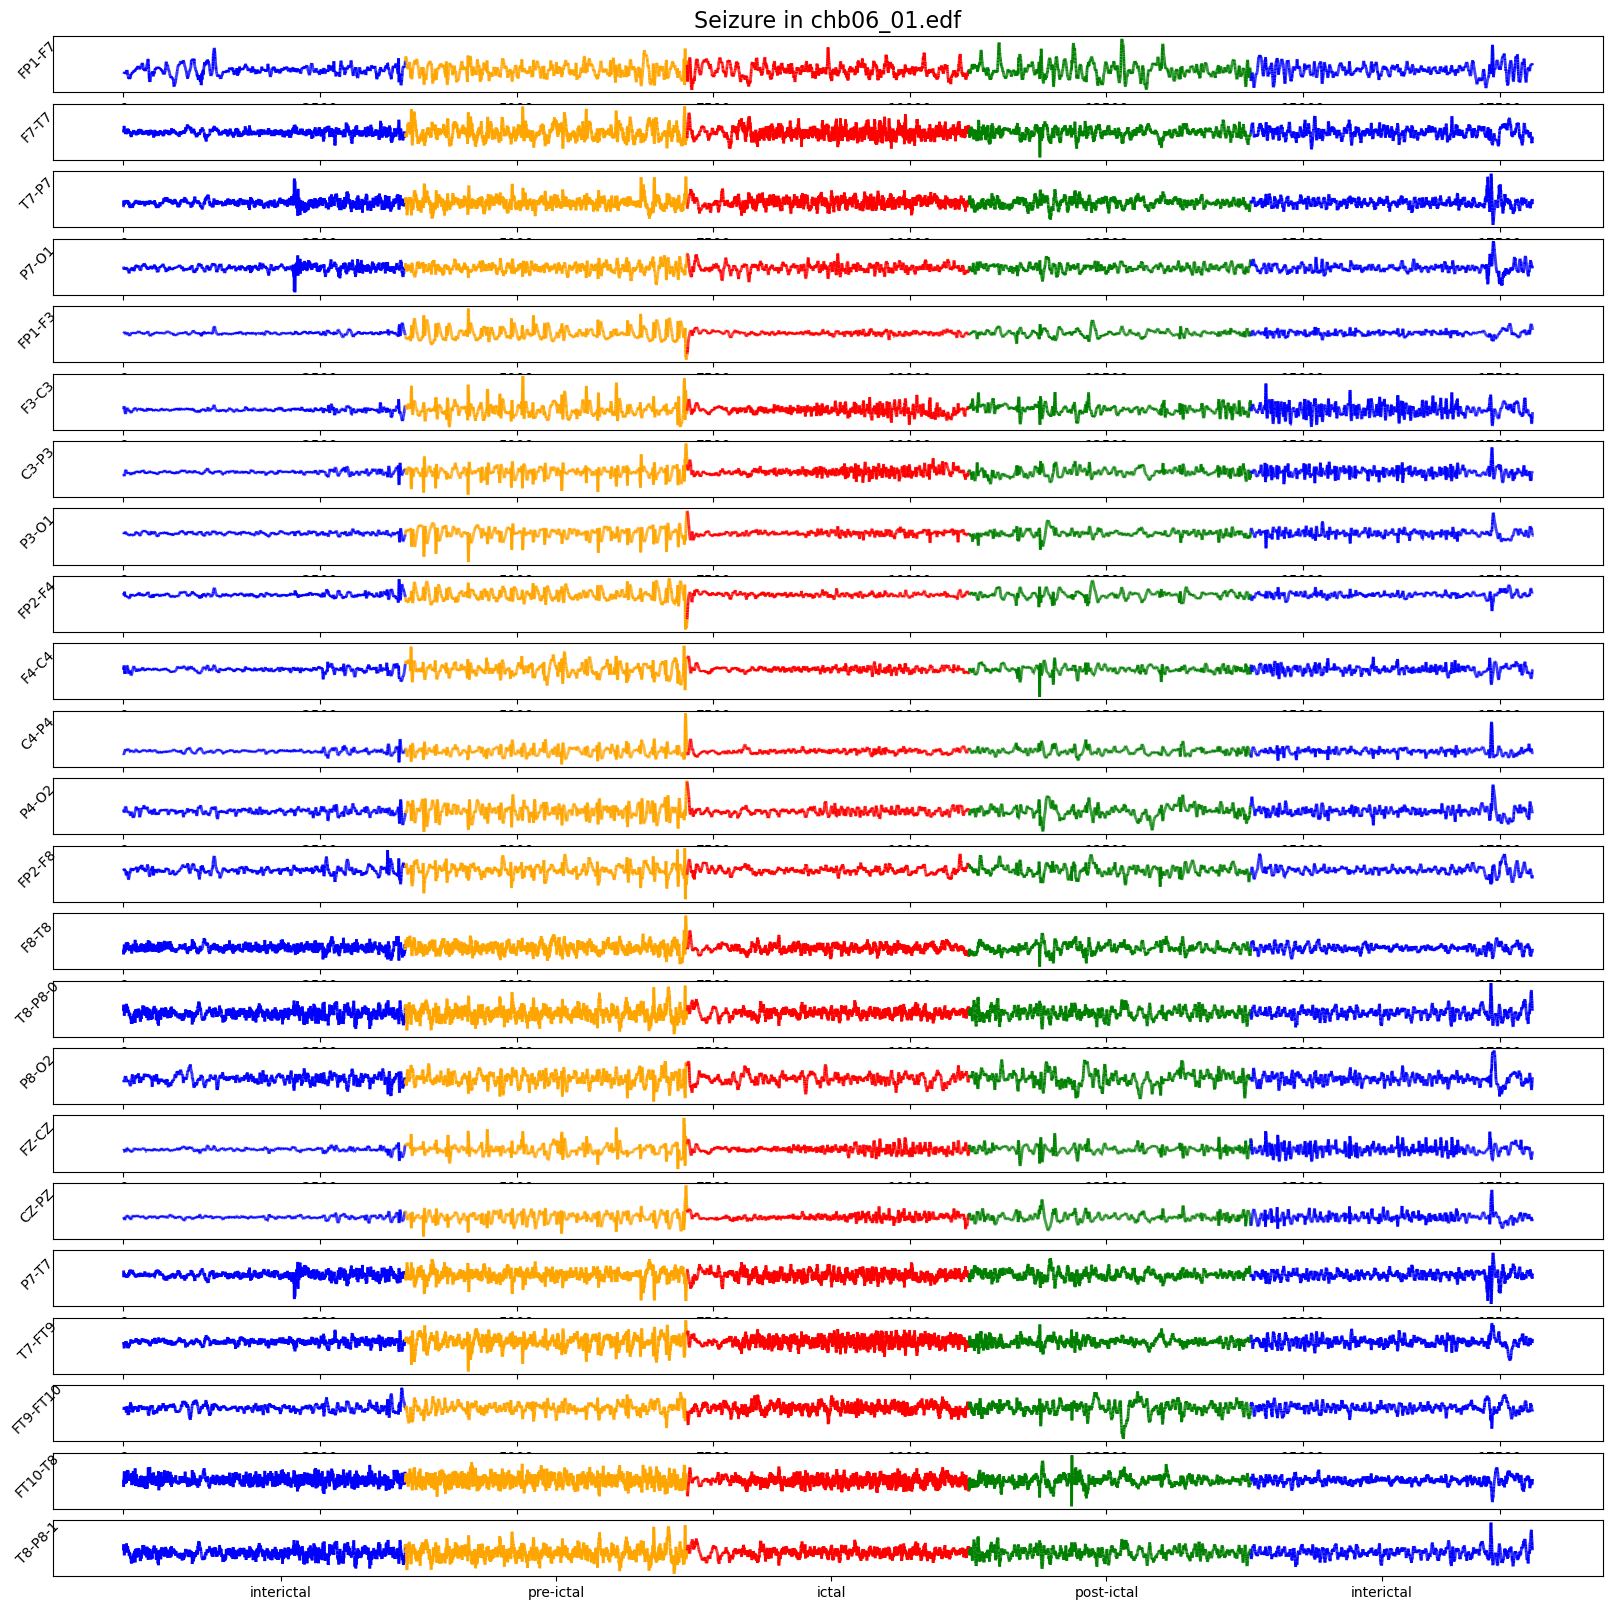

In [241]:
fig, axs = plt.subplots(23, figsize=(20, 20))

seizure_start = seizures['Seizure_start'].values[0] * 256
seizure_stop = seizures['Seizure_stop'].values[0] *256
duration = seizure_stop - seizure_start
begin_plot = seizure_start - duration * 2
end_plot = seizure_stop + duration * 2

for i in range(23):
    # retrieve data
    ord = raw_data[i][begin_plot:end_plot]
    abs = np.arange(ord.shape[0])
    label = np.zeros(ord.shape[0])
    label[seizure_start-begin_plot:seizure_stop-begin_plot] = 1
    label[seizure_start-begin_plot-duration:seizure_stop-begin_plot-duration] = 2
    label[seizure_start-begin_plot+duration:seizure_stop-begin_plot+duration] = 3
    # set up colors
    c = ['r' if a == 1 else 'orange' if a == 2 else 'g' if a == 3 else 'b' for a in label]
    # convert time series to line segments
    lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(abs[:-1], ord[:-1], abs[1:], ord[1:])]
    colored_lines = LineCollection(lines, colors=c, linewidths=(2,))
    # plot data
    axs[i].add_collection(colored_lines)
    axs[i].autoscale_view()
    axs[i].set_ylabel(channels[i], rotation=45)
    axs[i].set_yticks([])
    
axs[0].set_title("Seizure in chb06_01.edf", fontsize=16)
axs[22].set_xticks([2000, 5500, 9000, 12500, 16000], ['interictal', 'pre-ictal', 'ictal','post-ictal','interictal'])
plt.show()

### Data visualization after script transformation (with the numpy file)

Let us load one numpy file from the train database. It has been transformed by the script through the strategy described [here](#process) but has not yet been through the `get_train` or `get_test` function (still for the patient n°6).

In [10]:
X_train = np.load("dataset/chb06/chb06_X_train.npy")
X_train.shape

(84536, 256, 15)

It has a dimension of `nb_samples x nb_recordings x nb_electrodes`. This means that for every sample (84536), there are 256 recording points, for a total duration of one second, recording the electic impulse from 15 electrodes.

For every sample and electrode, X_train contains the values registered during the monitoring (we will just display the first twenty ones).

In [13]:
print(X_train[0,0:20,0])
print()

[64.25    0.1953  0.1953  0.1953  0.1953  0.586   1.367   0.9766  0.586
  0.1953  2.148  10.74   18.17   27.94   30.67   29.11   24.03   22.08
 22.08   19.73  ]


We will know go through some basic statistics.

In [19]:
print(f'The maximum value is {np.max(X_train)}, the minimum value is {np.min(X_train)}, the mean value is {np.mean(X_train)}')

The maximum value is 1665.0, the minimum value is -1657.0, the mean value is 0.066162109375


Let's do the same thing with y_train and plot the times to see where are the seizures.

The length of y_train is 84536.


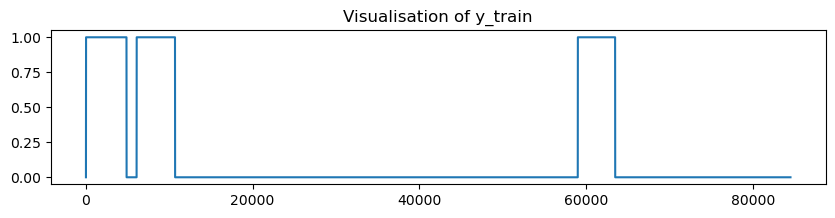

In [244]:
y_train = np.load("dataset/chb06/chb06_y_train.npy")
print(f'The length of y_train is {y_train.shape[0]}.')
figure = plt.figure(figsize=(10, 2))
plt.title('Visualisation of y_train')
plt.plot(y_train)
plt.show(block=False)

Let's retrieve the values from the third seizure to visualize EEGs.

In [245]:
begin_time = np.min(np.where(y[50000:80000] == 1))
end_time = np.max(np.where(y[50000:80000] == 1))
duration = end_time - begin_time
sampling_rate = 256

print(f'The third epileptic seizure occures between \"time\" {50000 + begin_time} and {50000 + end_time} and lasts about {int((end_time - begin_time)/(sampling_rate))} seconds.')

The third epileptic seizure occures between "time" 59011 and 63490 and lasts about 17 seconds.


Let's visualize an epileptic crises on several electrodes.

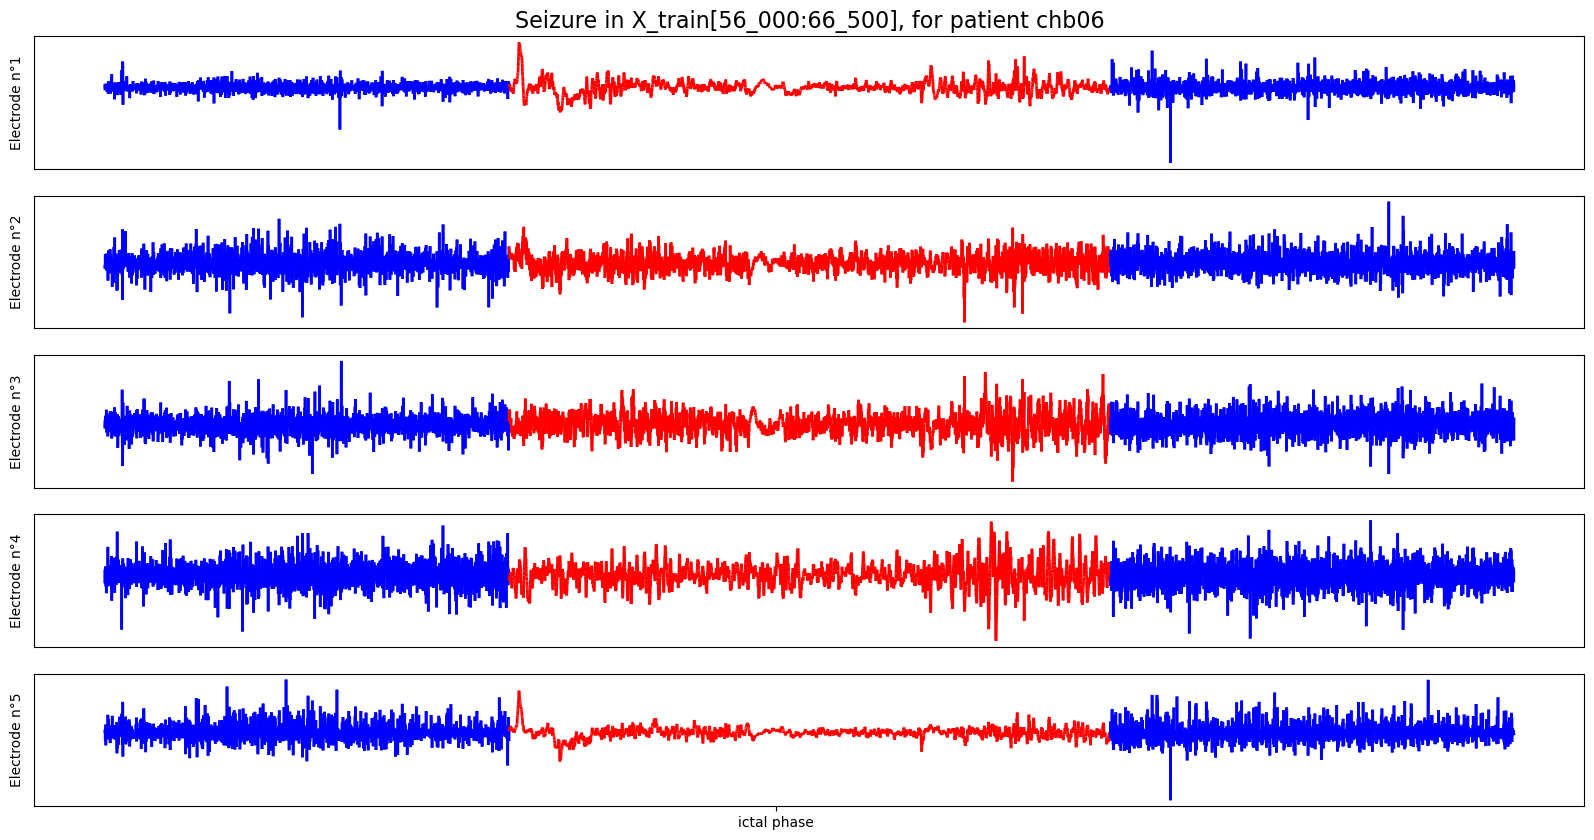

In [246]:
fig, axs = plt.subplots(5, figsize=(20, 10))
axs[0].set_title("Seizure in X_train[56_000:66_500], for patient chb06", fontsize=16)

for i in range(5):
    # rename variables
    ord = X[56_000:66_500,0,i]
    abs = np.arange(ord.shape[0])
    # set up colors 
    c = ['r' if a else 'b' for a in y_plot]
    # convert time series to line segments
    lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(abs[:-1], ord[:-1], abs[1:], ord[1:])]
    colored_lines = LineCollection(lines, colors=c, linewidths=(2,))
    # plot data
    axs[i].add_collection(colored_lines)
    axs[i].autoscale_view()
    axs[i].set_ylabel(f'Electrode n°{i+1}', rotation=90, fontsize=10)
    axs[i].set_yticks([])
    axs[i].set_xticks([])
axs[4].set_xticks([5000], ['ictal phase'])
    
plt.show()


**Comment :** As we can see it, an epileptic seizure can result in an augmentation of a signal (elctrode n°1) or in a decrease of it (electrode n°5).

### Loading the data with 'get_train' & 'get_test'

First, we load the data using the utility function designed for the challenge in `problem.py`.

In [3]:
from problem import get_train_data, get_test_data
data_train, labels_train = get_train_data()
data_test, labels_test = get_test_data()

NameError: name 'patients' is not defined

`labels_trains` simply consists in the set of labels for the training set, stored as a `numpy.darray` <br>
`data_trains` consists in the set of sampled EEG recording for the training set, stored as a list of `numpy.darray`

One sample of an EEG recording is a numpy array representing the recording for 15 electrodes during a given period, with a sampling frequency of 256 Hz (i.e. 256 recording point per second).

!!! FAIRE UNE NOUVELLE VISU ICI POUR MONTRER QUE LES DONNEES ONT ETE MODIFIEES PAR LES FONCTIONS GET_TRAIN !!!

### Data statistics

In [ ]:
# Barplot of class distribution per patient?
# Energy distribution ?

# 4. Making a submission <a class="anchor" id="chapter_4"></a>

[TABLE OF CONTENT](#chapter_00)

Evaluation
---

Ranking is made according to the AUC of your classifiers.

Locally, the RAMP platform use a 3-fold cross-validation scheme implemented in the `get_cv` method.

The classifier's performance is evaluated on a separate test set which can be loaded just as the training data.

In [ ]:
data_test, labels_test = get_test_data()

Mandatory structure of a submission
---

A submission (usually stored in `./subsmissions/<submission_foldername>/`) must contain on file named `eegclassifier.py`.

This python script must itself implement :
 * A `blablabla` method that...

The two arguments must be understood as follow:
 * `blablabla` is ....


We illustrate this below with a simple example.

Illustration with a dummy random classifier
---

This classifier does not use data and just predict random labels. Still, it is a valid submission regarding the RAMP workflow.

Submitting to RAMP
---

To do a submission, you need to submit it on [ramp.studio](https://ramp.studio/). 

Go to your sandbox and copy-paste your code.

You can try your code with this command :
    
```bash
ramp_test_submission --submission starting_kit # --quick-test
```

# References and acknowledgments <a class="anchor" id="chapter_5"></a>

[TABLE OF CONTENT](#chapter_00)

References
---

[1]: <a class="anchor" id="ref_1"></a> Truong et al., Convolutional neural networks for seizure prediction using intracranial and scalp electroencephalogram, Neural Networks, 2018, https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8370634&tag=1 </br>
[2]: <a class="anchor" id="ref_2"></a> https://epilepsy.uni-freiburg.de/freiburg-seizure-prediction-project/eeg-database </br>
[3]: <a class="anchor" id="ref_3"></a>  https://physionet.org/content/chbmit/1.0.0/chb23/ </br>
[4]: <a class="anchor" id="ref_4"></a>  https://www.kaggle.com/c/seizure-detection </br>
[5]: <a class="anchor" id="ref_5"></a>  https://www.who.int/news-room/fact-sheets/detail/epilepsy </br>
[6]: <a class="anchor" id="ref_6"></a> https://dspace.mit.edu/handle/1721.1/54669 </br>

Acknowledgments
---

The database used in this challenge was made available through PhysioNet by team of investigators from Children’s Hospital Boston (CHB) and the Massachusetts Institute of Technology (MIT). See ref. [[3]](#ref_3) and [[6]](#ref_6).